In [ ]:
# ! git init .
# ! git remote add origin https://github.com/multifacs/transport-problem-new
# ! git pull origin master

In [1]:
from misc import test_time_mem
from misc import generate_random_transport_problem
from misc import round_to
from misc import timeout
import copy
from tp_potential import Data

import matplotlib.pyplot as plt

from simplex import simplex_method
from northwest import northwest_corner_method
from least import least_cost_cell_method
from vogel import vogels_approximation_method
from tp_potential import solve as potential_method

size = 5
min_cost = 1
max_cost = 10
min_supply = 10
max_supply = 40
min_demand = 5
max_demand = 30

In [2]:
ROUND_N = 3

@timeout(2)
def run_tests(n_loops: int, func, data: Data, method: str = "simplex"):
    global_res = dict(cost=0, time=0, memory=0)
    for _ in range(n_loops):
        res = test_time_mem(func, data, method)
        global_res["cost"] += res["cost"]
        global_res["time"] += res["time"]
        global_res["memory"] += res["memory"]

    global_res["cost"] /= n_loops
    global_res["time"] /= n_loops
    global_res["memory"] /= n_loops

    global_res["cost"] = round_to(global_res["cost"], ROUND_N)
    global_res["time"] = round_to(global_res["time"], ROUND_N)
    global_res["memory"] = round_to(global_res["memory"], ROUND_N)

    return global_res

In [3]:
def run_all(start, end, n_tests, n_loops):
    results = dict(
        x=[], highs=[], simplex=[], northwest=[], least=[], vogel=[], potential=[]
    )
    
    funcs = [potential_method, vogels_approximation_method, simplex_method, simplex_method, northwest_corner_method, least_cost_cell_method]
    methods = ["potential", "vogel", "simplex", "highs", "northwest", "least"]

    for size in range(start, end + 1):
        for test in range(n_tests):
            cost_matrix, supply, demand = generate_random_transport_problem(
                size,
                size,
                min_cost,
                max_cost,
                min_supply,
                max_supply,
                min_demand,
                max_demand,
            )
            
            data = Data(
                supply.copy(),
                demand.copy(),
                copy.deepcopy(cost_matrix),
            )
            
            run_results = dict(
                highs=None, simplex=None, northwest=None, least=None, vogel=None, potential=None
            )
            
            test_failed_flag = False
            for f, m in zip(funcs, methods):
                try:
                    run_results[m] = run_tests(
                        n_loops,
                        f,
                        copy.deepcopy(data),
                        m,
                    )
                except Exception as e:
                    print(e)
                    test_failed_flag = True
                    break
            
            if test_failed_flag:
                continue
            for m in methods:
                results[m].append(run_results[m])

            results["x"].append(size)
    print(results["x"])
    return results

In [4]:
def plot_all(results, verbose=False, xlabel="Размер матрицы n x n"):
    x = results["x"]
    
    methods = ["highs", "simplex", "northwest", "least", "vogel", "potential"]
    colors = ["#0006", "#0FF20F66", "#F2AA0F66", "#0F5EF266", "#F20F8066", "#5B729E66"]

    # Create a figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

    for method, color in zip(methods, colors):
        # Plot on the first subplot
        ax1.plot(
            x,
            [x["cost"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
            linestyle="dotted",
        )

        # Plot on the second subplot
        ax2.plot(
            x,
            [x["time"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
            linestyle="dotted",
        )

        # Plot on the second subplot
        ax3.plot(
            x,
            [x["memory"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
            linestyle="dotted",
        )

    ax1.set_title("Решения")
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Ответ")
    ax1.legend()

    ax2.set_title("Время")
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Время, сек.")
    ax2.legend()

    ax3.set_title("Память")
    ax3.set_xlabel(xlabel)
    ax3.set_ylabel("Память, кб")
    ax3.legend()

    # Adjust the spacing between subplots
    # plt.tight_layout()

    # Display the plot
    plt.show()
    
    if verbose:
        for method, color in zip(methods, colors):
            # Create a figure and subplots
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
            # Plot on the first subplot
            ax1.plot(
                x,
                [x["cost"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
                linestyle="dotted",
            )
    
            # Plot on the second subplot
            ax2.plot(
                x,
                [x["time"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
                linestyle="dotted",
            )
    
            # Plot on the second subplot
            ax3.plot(
                x,
                [x["memory"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
                linestyle="dotted",
            )
    
            ax1.set_title("Решения")
            ax1.set_xlabel(xlabel)
            ax1.set_ylabel("Ответ")
            ax1.legend()
        
            ax2.set_title("Время")
            ax2.set_xlabel(xlabel)
            ax2.set_ylabel("Время, сек.")
            ax2.legend()
        
            ax3.set_title("Память")
            ax3.set_xlabel(xlabel)
            ax3.set_ylabel("Память, кб")
            ax3.legend()
        
            # Adjust the spacing between subplots
            # plt.tight_layout()
        
            # Display the plot
            plt.show()

In [5]:
def scatter_all(results, verbose = False, xlabel="Размер матрицы n x n"):
    x = results["x"]
    
    methods = ["highs", "simplex", "northwest", "least", "vogel", "potential"]
    colors = ["#0006", "#0FF20F66", "#F2AA0F66", "#0F5EF266", "#F20F8066", "#5B729E66"]

    # Create a figure and subplots
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

    for method, color in zip(methods, colors):
        # Plot on the first subplot
        ax1.scatter(
            x,
            [x["cost"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
        )

        # Plot on the second subplot
        ax2.scatter(
            x,
            [x["time"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
        )

        # Plot on the second subplot
        ax3.scatter(
            x,
            [x["memory"] for x in results[method]],
            color=color,
            label=method,
            marker=".",
        )

    ax1.set_title("Решения")
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel("Ответ")
    ax1.legend()

    ax2.set_title("Время")
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel("Время, сек.")
    ax2.legend()

    ax3.set_title("Память")
    ax3.set_xlabel(xlabel)
    ax3.set_ylabel("Память, кб")
    ax3.legend()

    # Adjust the spacing between subplots
    # plt.tight_layout()

    # Display the plot
    plt.show()
    
    if verbose:
        for method, color in zip(methods, colors):
            # Create a figure and subplots
            fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
            # Plot on the first subplot
            ax1.scatter(
                x,
                [x["cost"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
            )
    
            # Plot on the second subplot
            ax2.scatter(
                x,
                [x["time"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
            )
    
            # Plot on the second subplot
            ax3.scatter(
                x,
                [x["memory"] for x in results[method]],
                color=color,
                label=method,
                marker=".",
            )
    
            ax1.set_title("Решения")
            ax1.set_xlabel(xlabel)
            ax1.set_ylabel("Ответ")
            ax1.legend()
        
            ax2.set_title("Время")
            ax2.set_xlabel(xlabel)
            ax2.set_ylabel("Время, сек.")
            ax2.legend()
        
            ax3.set_title("Память")
            ax3.set_xlabel(xlabel)
            ax3.set_ylabel("Память, кб")
            ax3.legend()
        
            # Adjust the spacing between subplots
            # plt.tight_layout()
        
            # Display the plot
            plt.show()

In [6]:
SIZE_START = 3
SIZE_END = 10
LOOPS = 1

results = run_all(SIZE_START, SIZE_END, 1, LOOPS)

C:\Users\Nick\Documents\Programming\Python\transport-problem-new\simplex.py:39: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method=method)


function [solve] timeout [1 seconds] exceeded!
[3, 4, 5, 6, 8, 9, 10]


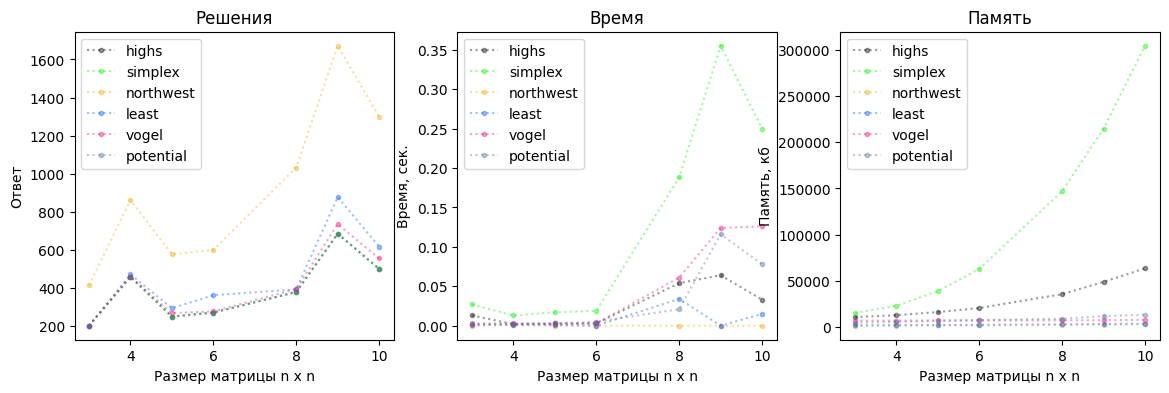

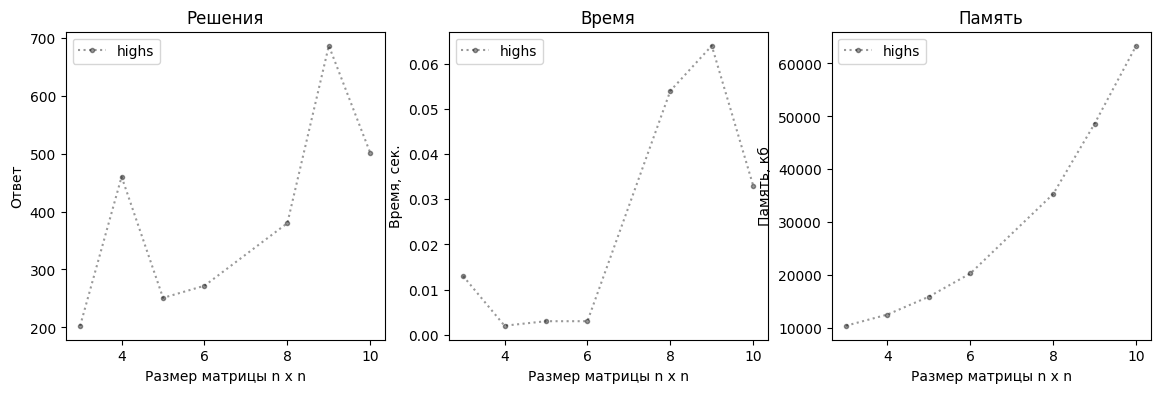

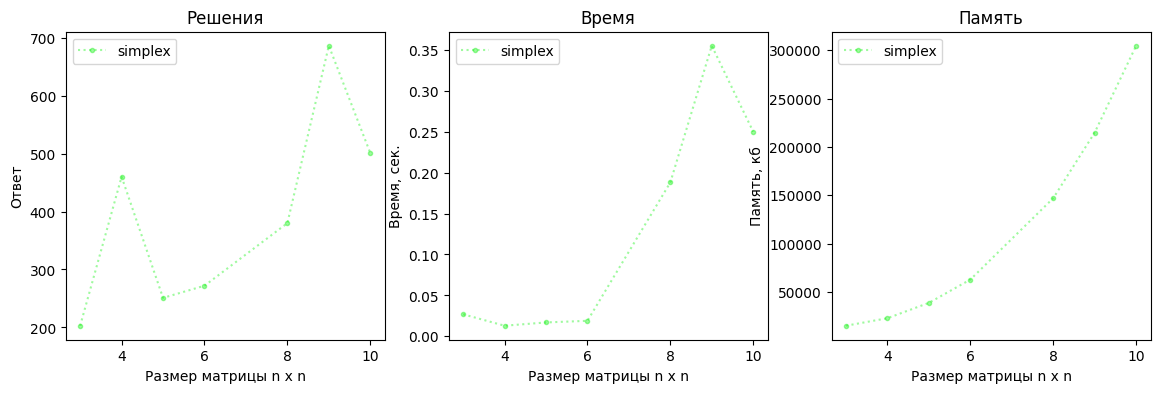

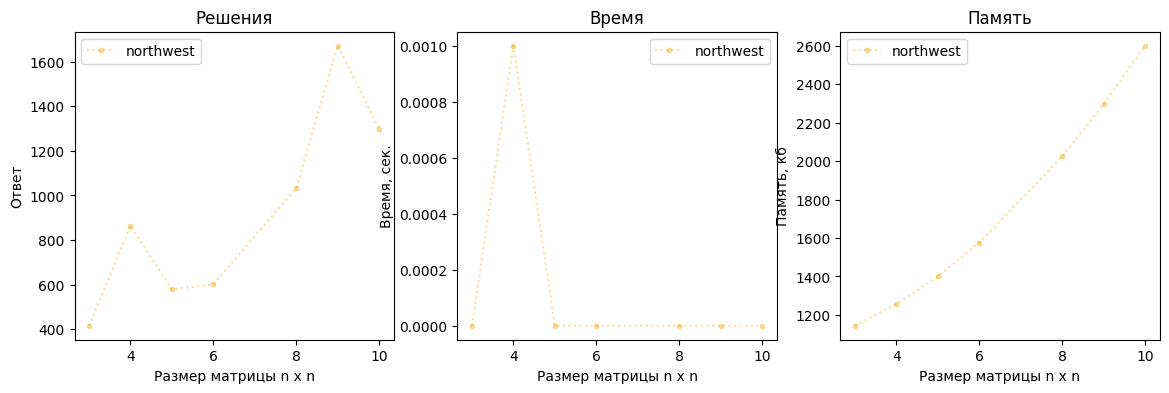

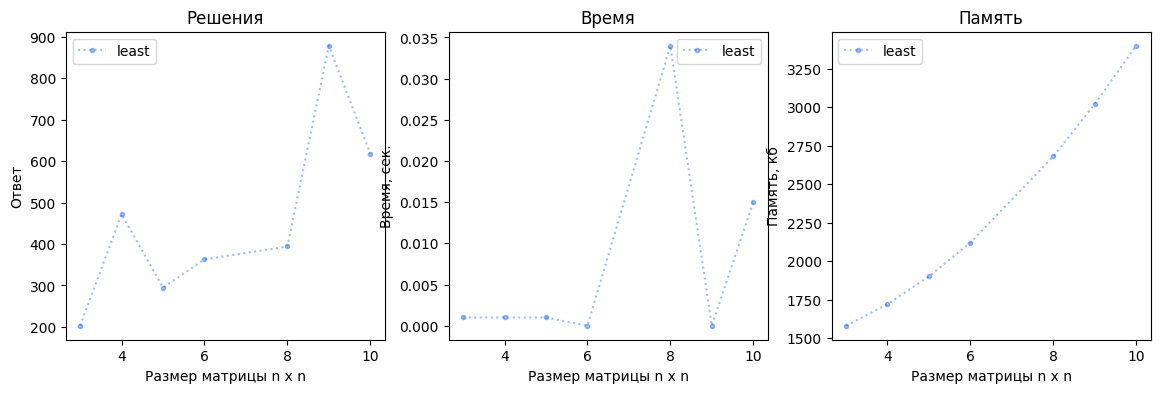

In [ ]:
plot_all(results, verbose=True)

In [15]:
SIZE_START = 3
SIZE_END = 10
LOOPS = 1
TESTS = 3

results = run_all(SIZE_START, SIZE_END, TESTS, LOOPS)

C:\Users\Nick\Documents\Programming\Python\transport-problem-new\simplex.py:39: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method=method)


function [solve] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [solve] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
function [vogels_approximation_method] timeout [1 seconds] exceeded!
[3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8]


In [17]:
results

{'x': [3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 8, 8],
 'highs': [{'cost': 357.0, 'time': 0.005, 'memory': 10471.0},
  {'cost': 276.0, 'time': 0.003, 'memory': 10463.0},
  {'cost': 213.0, 'time': 0.003, 'memory': 10455.0},
  {'cost': 407.0, 'time': 0.004, 'memory': 12566.0},
  {'cost': 249.0, 'time': 0.003, 'memory': 12558.0},
  {'cost': 409.0, 'time': 0.002, 'memory': 12550.0},
  {'cost': 550.0, 'time': 0.003, 'memory': 15927.0},
  {'cost': 217.0, 'time': 0.001, 'memory': 15911.0},
  {'cost': 432.0, 'time': 0.001, 'memory': 15903.0},
  {'cost': 324.0, 'time': 0.003, 'memory': 20290.0},
  {'cost': 736.0, 'time': 0.002, 'memory': 20282.0},
  {'cost': 569.0, 'time': 0.003, 'memory': 20274.0},
  {'cost': 434.0, 'time': 0.033, 'memory': 26087.0},
  {'cost': 483.0, 'time': 0.048, 'memory': 26425.0},
  {'cost': 370.0, 'time': 0.109, 'memory': 35581.0},
  {'cost': 447.0, 'time': 0.185, 'memory': 36397.0}],
 'simplex': [{'cost': 357.0, 'time': 0.017, 'memory': 15061.0},
  {'cost': 276.0, 'tim

In [ ]:
scatter_all(results, verbose=True)

C:\Users\Nick\AppData\Local\Temp\ipykernel_18824\2045542178.py:54: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Nick\Documents\Programming\Python\transport-problem-new\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


In [ ]:
SIZE = 3
TESTS = 10
LOOPS = 3

results = dict(
    simplex=[],
    northwest=[],
    least=[],
    vogel=[],
    potential=[]
)

x = []

for size in range(1, TESTS + 1):

    try:
        results["potential"].append(run_tests(potential_method, SIZE, LOOPS, potential=True))
        results["vogel"].append(run_tests(vogels_approximation_method, SIZE, LOOPS))
    except:
        continue
    x.append(size)
    results["simplex"].append(run_tests(simplex_method, SIZE, LOOPS))
    results["northwest"].append(run_tests(northwest_corner_method, SIZE, LOOPS))
    results["least"].append(run_tests(least_cost_cell_method, SIZE, LOOPS))

    # print(results["simplex"][-1])

print(x)

plot_all(x, results, "Номер теста")

c:\Users\Nick\Documents\Programming\Python\transport-problem\simplex.py:34: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method='simplex')


[1, 2, 3, 4, 5]


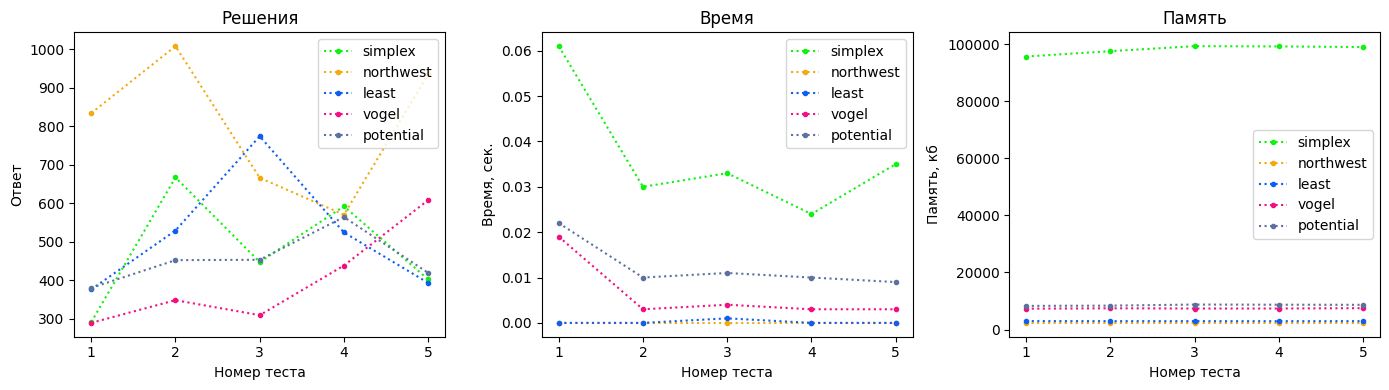

In [7]:
SIZE = 7
TESTS = 5
LOOPS = 3

results = dict(
    simplex=[],
    northwest=[],
    least=[],
    vogel=[],
    potential=[]
)

x = []

for size in range(1, TESTS + 1):

    try:
        results["potential"].append(run_tests(potential_method, SIZE, LOOPS, potential=True))
        results["vogel"].append(run_tests(vogels_approximation_method, SIZE, LOOPS))
    except:
        continue
    x.append(size)
    results["simplex"].append(run_tests(simplex_method, SIZE, LOOPS))
    results["northwest"].append(run_tests(northwest_corner_method, SIZE, LOOPS))
    results["least"].append(run_tests(least_cost_cell_method, SIZE, LOOPS))

    # print(results["simplex"][-1])

print(x)

plot_all(x, results, "Номер теста")

c:\Users\Nick\Documents\Programming\Python\transport-problem\simplex.py:34: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  res = linprog(c, A_eq=A_eq, b_eq=b_eq, method=method)


[3, 4, 5, 6, 7, 8]


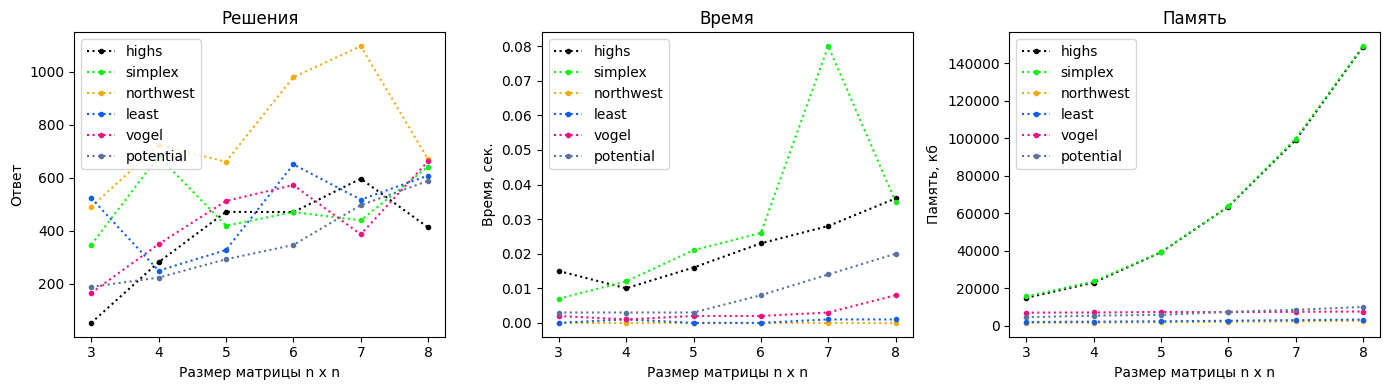

In [9]:
SIZE_START = 3
SIZE_END = 10
LOOPS = 1

results = dict(
    highs=[],
    simplex=[],
    northwest=[],
    least=[],
    vogel=[],
    potential=[]
)

x = []

for size in range(SIZE_START, SIZE_END + 1):

    try:
        results["potential"].append(run_tests(potential_method, size, LOOPS, potential=True))
        results["vogel"].append(run_tests(vogels_approximation_method, size, LOOPS))
    except:
        continue
    x.append(size)
    results["highs"].append(run_tests(simplex_method, size, LOOPS))
    results["simplex"].append(run_tests(simplex_method, size, LOOPS))
    results["northwest"].append(run_tests(northwest_corner_method, size, LOOPS))
    results["least"].append(run_tests(least_cost_cell_method, size, LOOPS))

    # print(results["simplex"][-1])

print(x)

plot_all(x, results)